In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data= pd.read_csv("lifestyle_fitness_data.csv")

In [20]:
data.index= range(1, len(data) + 1)
print("\n First 10 rows: ")
display(data.head(10))


 First 10 rows: 


,Date,Steps,Calories,ActiveMinutes,SleepHours,WaterIntake,MoodScore
1,2025-12-01,7335,701,66,6.5,2.4,3
2,2025-12-02,19276,1078,38,6.0,1.1,3
3,2025-12-03,19779,1245,49,5.9,2.8,3
4,2025-12-04,4516,1399,49,7.9,1.7,6
5,2025-12-05,19724,1802,116,5.6,2.5,1
6,2025-12-06,4426,1981,47,6.6,2.5,5
7,2025-12-07,18668,841,58,5.3,1.8,6
8,2025-12-08,14305,1411,110,6.8,1.7,10
9,2025-12-09,6962,668,116,7.0,1.3,4
10,2025-12-10,13884,1800,26,7.5,2.4,9


In [80]:
print("\n Dataset info:")
display(data.info())


 Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 1 to 31
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           31 non-null     datetime64[ns]
 1   Steps          31 non-null     int64         
 2   Calories       31 non-null     int64         
 3   ActiveMinutes  31 non-null     int64         
 4   SleepHours     31 non-null     float64       
 5   WaterIntake    31 non-null     float64       
 6   MoodScore      31 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 1.8 KB


None

In [12]:
print(" Summary Statistics: ")
display(data.describe())

 Summary Statistics: 


,Steps,Calories,ActiveMinutes,SleepHours,WaterIntake,MoodScore
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,10500.870968,1251.129032,67.677419,6.877419,2.093548,5.838710
std,6031.863508,418.989876,29.447566,0.942589,0.523409,2.684483
min,1000.000000,597.000000,25.000000,5.200000,1.000000,1.000000
25%,5289.500000,846.000000,41.000000,6.200000,1.750000,4.000000
50%,8087.000000,1250.000000,66.000000,6.800000,2.100000,6.000000
75%,15577.000000,1617.500000,93.500000,7.600000,2.500000,8.000000
max,19929.000000,1981.000000,116.000000,8.700000,3.000000,10.000000


# Data Cleaning

In [13]:
print(" Missing values per column :")
display(data.isnull().sum())

 Missing values per column :


Date             0
Steps            0
Calories         0
ActiveMinutes    0
SleepHours       0
WaterIntake      0
MoodScore        0
dtype: int64

In [21]:
data['Date']= pd.to_datetime(data['Date'])

# a. Steps over time

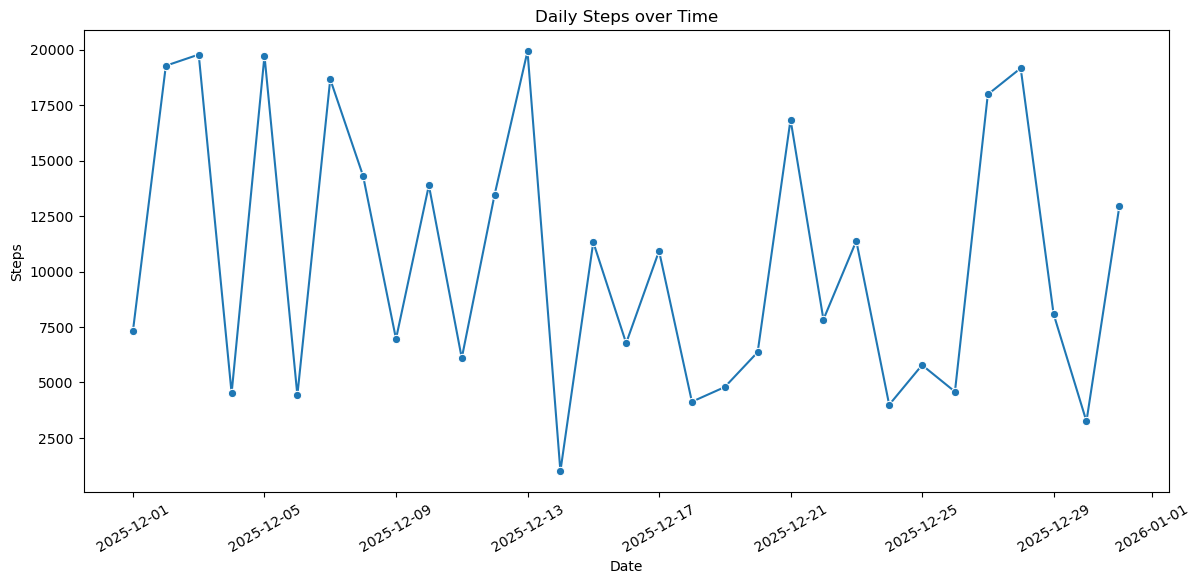

In [32]:
plt.figure(figsize=(14,6))
sns.lineplot(x='Date', y= 'Steps', data=data, marker='o')
plt.title("Daily Steps over Time")
plt.xticks(rotation=30)
plt.show()          

# b. Calories vs Active minutes

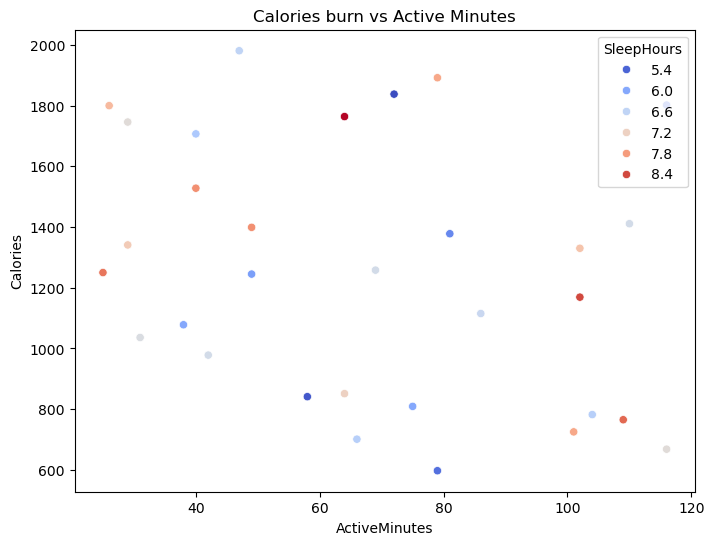

In [71]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='ActiveMinutes', y='Calories', data=data, hue='SleepHours', palette='coolwarm')
plt.title("Calories burn vs Active Minutes")
plt.show()

# c. Sleep Analysis

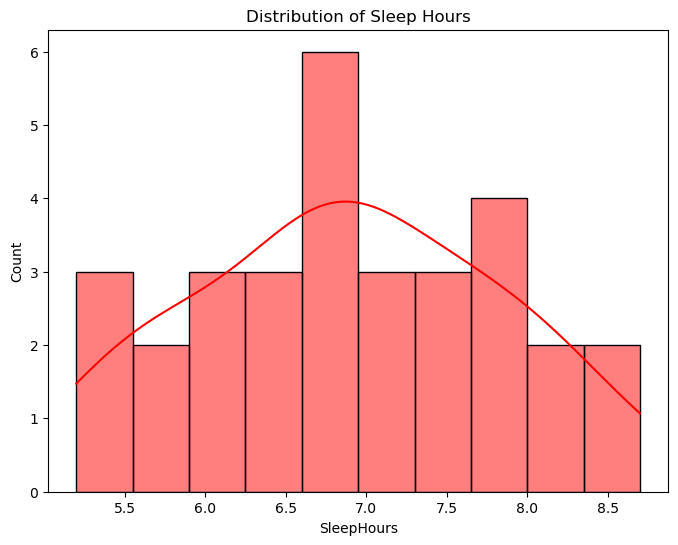

In [83]:
plt.figure(figsize=(8,6))
sns.histplot(data['SleepHours'], bins=10, kde='true', color='red')
plt.title('Distribution of Sleep Hours')
plt.show()

# d. Mood Score vs Lifestyle Metrics

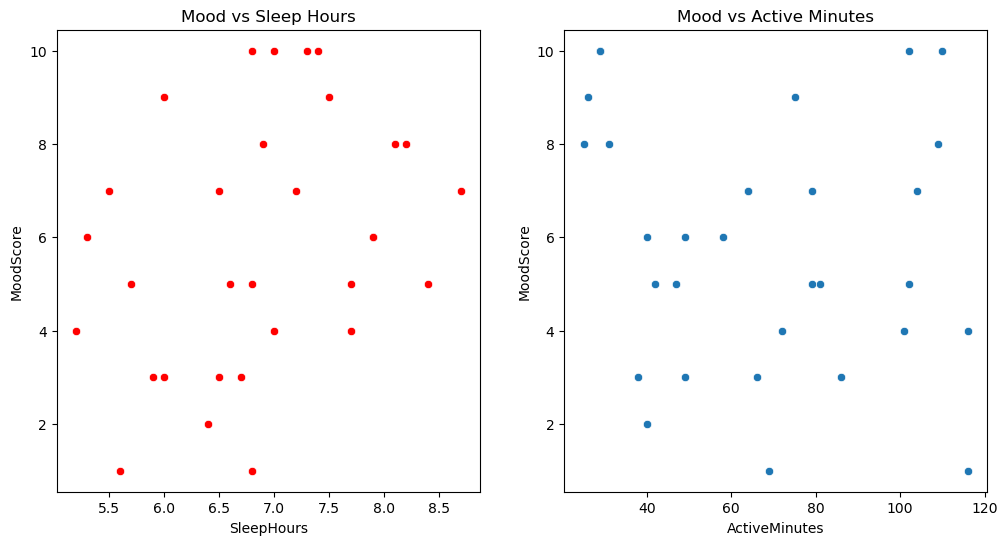

In [66]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(x='SleepHours', y='MoodScore', data=data, color='red')
plt.title('Mood vs Sleep Hours')
plt.subplot(1,2,2)
sns.scatterplot(x='ActiveMinutes', y='MoodScore', data=data)
plt.title('Mood vs Active Minutes')
plt.show()

# e. Water intake vs Mood

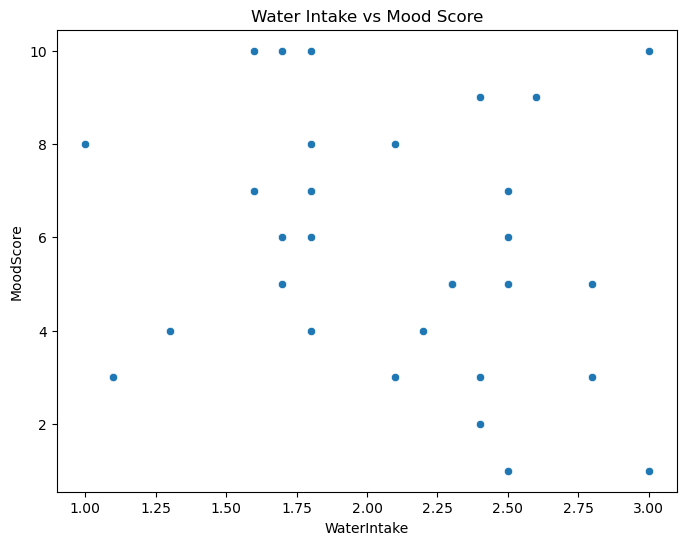

In [70]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='WaterIntake', y='MoodScore', data=data)
plt.title('Water Intake vs Mood Score')
plt.show()


# f. Correlation Analysis

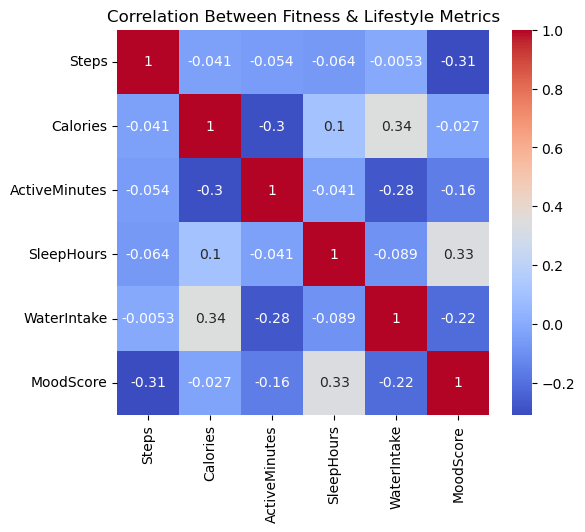

In [73]:
plt.figure(figsize=(6,5))
sns.heatmap(data.drop(columns=['Date']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Fitness & Lifestyle Metrics')
plt.show()

# Summary: 

In [75]:
avg_steps = data['Steps'].mean()
avg_calories = data['Calories'].mean()
avg_sleep = data['SleepHours'].mean()
avg_water = data['WaterIntake'].mean()
avg_mood = data['MoodScore'].mean()

print("Lifestyle & Fitness Averages :")
print(f"Average Steps: {avg_steps:.0f}")
print(f"Average Calories Burned: {avg_calories:.0f}")
print(f"Average Sleep Hours: {avg_sleep:.1f}")
print(f"Average Water Intake: {avg_water:.1f} liters")
print(f"Average Mood Score: {avg_mood:.1f}/10")

Lifestyle & Fitness Averages :
Average Steps: 10501
Average Calories Burned: 1251
Average Sleep Hours: 6.9
Average Water Intake: 2.1 liters
Average Mood Score: 5.8/10
